In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('testMaze.txt') as f:
    for line in f:
        print(line.strip())

************
*          *
*          *
*        * *
*        * *
*        * *
*     **** *
*     * G* *
*     *  * *
*     *  * *
*          *
************


In [3]:
mazelist = []
with open('testMaze.txt') as f:
    for line in f:
        mazelist.append(line.strip())
mazelist

['************',
 '*          *',
 '*          *',
 '*        * *',
 '*        * *',
 '*        * *',
 '*     **** *',
 '*     * G* *',
 '*     *  * *',
 '*     *  * *',
 '*          *',
 '************']

In [4]:
maze = np.array(mazelist).view('U1').reshape((len(mazelist), len(mazelist[0])))
print(maze.shape)
maze

(12, 12)


array([['*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', '*', '*', '*', '*', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', '*', ' ', 'G', '*', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', '*', ' ', ' ', '*', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', '*', ' ', ' ', '*', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
       ['*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*']],
      dtype='<U1')

In [5]:
for i in range(maze.shape[0]):
    for j in range(maze.shape[1]):
        print(maze[i,j],end='')
    print()

************
*          *
*          *
*        * *
*        * *
*        * *
*     **** *
*     * G* *
*     *  * *
*     *  * *
*          *
************


In [6]:
def showQ(Q, title, ax):
    (m, n, _) = Q.shape
    gridsize = max(m, n)
    rows = np.floor(np.linspace(0, m - 0.5, gridsize))
    cols = np.floor(np.linspace(0, n - 0.5, gridsize))
    ygrid, xgrid = np.meshgrid(rows, cols, indexing='ij')
    points = np.vstack((ygrid.flat, xgrid.flat))
    Qmins = [np.min( Q[int(s1), int(s2), :]) for (s1, s2) in zip(points[0, :], points[1, :])]
    Qmins = np.asarray(Qmins).reshape(xgrid.shape)
    ax.plot_surface(xgrid, ygrid, Qmins, color='yellow')
    plt.ylim(m - 1 + 0.5, 0 - 0.5)
    ax.set_zlabel('Qmin')
    ax.set_title(f'Min {np.min(Qmins):.1f} Max {np.max(Qmins):.1f}')

In [7]:
def showPolicy(Q):
    (m, n, _) = Q.shape
    bestactions = np.argmin(Q, axis=2)
    prow, pcol = np.meshgrid(np.arange(m), np.arange(n), indexing='ij')
    arrowrow = actions[:, 0][bestactions]
    arrowcol = actions[:, 1][bestactions]
    plt.quiver(pcol, prow, arrowcol, -arrowrow)
    walls_row, walls_col = np.where(maze[1:-1, 1:-1] == '*') 
    plt.plot(walls_col, walls_row, 'ro', ms=15, alpha=0.5)
    goal_row, goal_col = np.where(maze[1:-1, 1:-1] == 'G')
    plt.plot(goal_col, goal_row, 'go', ms=15, alpha=0.5)
    plt.ylim(m - 1 + 0.5, 0 - 0.5)
    plt.xlim(0 - 0.5, n - 1 + 0.5)

In [8]:
m, n = maze.shape
m -= 2  # for ceiling and floor
n -= 2  # for walls
actions = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]])  # changes in row and column position of RL agent

def init_Q(maze):
    Q = np.zeros((m, n, 4))
    Qmc = np.zeros((m, n, 4))

    ### Set Q value of invalid actions to np.inf
    for mi in range(m):
        for ni in range(n):
            for ai in range(4):
                r = mi + actions[ai, 0]
                c = ni + actions[ai, 1]
                if maze[r + 1, c + 1] == '*':  # showing ai was invalid action
                    Q[mi, ni, ai] = np.inf
                    Qmc[mi, ni, ai] = np.inf
                    
    return Q, Qmc

In [9]:
nSteps = 100
rho = 0.1
epsilon = 0.2

In [10]:
trace = np.zeros((nSteps, 3)) # for x, y, and a

In [11]:
from IPython.display import display, clear_output

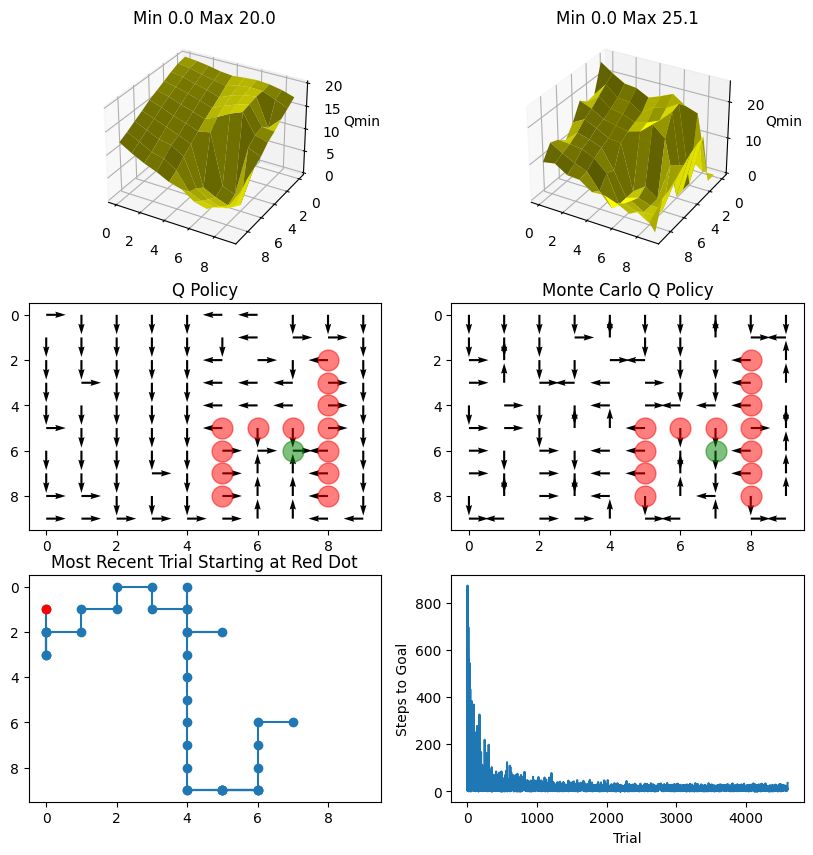

In [12]:
fig = plt.figure(figsize=(10, 10))

Q, Qmc = init_Q(maze)

nSteps = 100000
rho = 0.1
epsilon = 0.2
trace = np.zeros((nSteps, 3)) # for x, y, and a

s = np.array([1, 1])  # start position
a = 1 #first action (index)
trials = []
steps = 0
goals = 0

for step in range(nSteps):
    trace[steps, :] = s.tolist() + [a]
    here = maze[s[0] + 1, s[1] + 1]
    if here == 'G':
        # Found the Goal!
        goals += 1
        Q[s[0], s[1], a] = 0
        if steps > 0:
            Q[sold[0], sold[1], aold] += rho * (1 - Q[sold[0], sold[1], aold])
            
        # Monte Carlo update
        cost = 0
        for sai in range(steps, -1, -1):
            r, c, act = trace[sai, :]
            r, c, act = int(r), int(c), int(act)
            Qmc[r, c, act] = (1 - rho) * Qmc[r, c, act] + rho * cost
            cost += 1

        s = np.array([np.random.randint(0, m), np.random.randint(0, n)])
        trials.append(steps)
    
    else:
        # Not goal
        steps += 1    
        Qfunc = Q  # Qfunc = Qmc # to use Monte Carlo policy to drive behavior
    
        # Pick next action a
        if np.random.uniform() < epsilon:
            validActions = [a for (i, a) in enumerate(range(4)) 
                            if not np.isinf(Qfunc[s[0], s[1], i])]
            a = np.random.choice(validActions)
        else:
            a = np.argmin(Qfunc[s[0], s[1], :])

        if steps > 1:
            Q[sold[0], sold[1], aold] += rho * (1 + Q[s[0], s[1], a] - Q[sold[0], sold[1], aold])

        sold = s
        aold = a
        s = s + actions[a, :]

        # Update display each time goal is reached until reached 20 times,
        #  then update display only when number of goals reached is divisible by 100
        
    if (here == 'G' and (goals < 100 or goals % 100 == 0)):
        
        fig.clf()
        
        ax = fig.add_subplot(3, 2, 1, projection='3d')
        showQ(Q, 'TD', ax)

        ax = fig.add_subplot(3, 2, 2, projection='3d')
        showQ(Qmc, 'Monte Carlo', ax)
        plt.subplot(3, 2, 3)
        showPolicy(Q)
        plt.title('Q Policy')

        plt.subplot(3, 2, 4)
        showPolicy(Qmc)
        plt.title('Monte Carlo Q Policy')

        plt.subplot(3, 2, 5)
        plt.plot(trace[:steps + 1, 1], trace[:steps + 1, 0], 'o-')
        plt.plot(trace[0, 1], trace[0, 0], 'ro')
        plt.xlim(0 - 0.5, 9 + 0.5)
        plt.ylim(9 + 0.5, 0 - 0.5)
        plt.title('Most Recent Trial Starting at Red Dot')

        plt.subplot(3, 2, 6)
        plt.plot(trials, '-')
        plt.xlabel('Trial')
        plt.ylabel('Steps to Goal')

        clear_output(wait=True)
        display(fig);

    if here == 'G':
        steps = 0
        
clear_output(wait=True)